<a href="https://colab.research.google.com/github/Utkarsh-Mishra-dev/MLP-Project-T3-2024/blob/main/21f3002371_notebook_t32024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Practice Project (CS2008P)- 2024 Term 3

### Description:
## Predict the Success of Bank Telemarketing
**The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**

* **last contact date:** last contact date
* **age (numeric)**
* **job :** type of job
* **marital :** marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* **education (categorical:** "unknown","secondary","primary","tertiary")
* **default:** has credit in default? (binary: "yes","no")
* **balance:** average yearly balance, in euros (numeric)
* **housing:** has housing loan? (binary: "yes","no")
* **loan:** has personal loan? (binary: "yes","no")
* **contact:** contact communication type (categorical: "unknown","telephone","cellular")
* **duration:** last contact duration, in seconds (numeric)
* **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* **previous:** number of contacts performed before this campaign and for this client (numeric)
* **poutcome:** outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**
* **target:** has the client subscribed a term deposit? (binary: "yes","no")

## Importing Libraries
### In this section, the libraries necessary for the project are imported.

In [ ]:
import numpy as np        # For numerical and array operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For statistical data visualization

# For machine learning algorithms, we will import Scikit-Learn APIs as below
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, cross_val_score

### Libraries for Model Building

In [ ]:
# Importing Important Models and evaluation metrices for Model Building
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,classification_report
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier #eXtreme Gradient Boosting
from lightgbm import LGBMClassifier #Light Gradient Boosting Machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier

## Data Loading
### The Datasets of the competition are loaded in this section.

In [ ]:
train = pd.read_csv("/kaggle/input/classification-dataset-for-mlp-project-t32024/train.csv") # train dataset
test = pd.read_csv("/kaggle/input/classification-dataset-for-mlp-project-t32024/test.csv") # test dataset

## EDA and Visualization
### In this section, Exploratory Data Analysis and visualization of the dataset is covered with insights.

In [ ]:
# The shape attribute returns a tuple representing the number of rows and columns
train.shape # (number of rows, number of columns)

(39211, 16)

In [ ]:
train.head(7) # Shows the top 7 tuples of train dataset

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes


### Dataset Head

For the training dataset we have,

**Number of Rows** equal 39,211

**Number of Columns/Features** equal 15 with last Column being **Target** Variable with Yes/No Values.

In [ ]:
test.shape

(10000, 15)

In [ ]:
test.head(7)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
5,2010-11-20,44,services,married,secondary,no,-289,no,yes,cellular,487,1,118,1,other
6,2010-04-17,28,admin.,married,secondary,no,254,no,yes,cellular,333,3,-1,0,NaN


For the testing dataset we have,

**Number of Rows** equal 10,000

**Number of Columns/Features** equal 15 with **Target** Variable values to predict

### Knowing the number of Null Values in Dataset

In [ ]:
train.isna().sum() # It displays the total count of NaN (missing) values for each feature

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [ ]:
train.isna().sum()/len(train)*100 # Calculate the percentage of missing values for each column in the training dataset

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

**poutcome, contact, education,** and **job** are some of the columns with missing value present with the highest percentage of missing value is in poutcome column with around **75.1%.**

### Describe the Train dataset
The 'describe()' function provides a summary of the central tendency, dispersion, and shape of the dataset's numerical features. It includes statistics such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [ ]:
train.describe() # statistical summary

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


**age:** The thing to notice about 'age' is its minimum value to maximum value range that is 77 years with maximum being 95. The other thing that I noticed is the minimum age is 18 that is consider the age eligible to have Bank accounts etc. in most of the countries.

**balance:** The high Standard deviation in the 'balance' suggest that some clients have very high or very low balances. The range of the feature is from the overdrawn amount of 8019 to surplus 1,02,127.

**duration:** The average duration of call is around 439 seconds or approx 7 minutes. This indicate that the people have gave time to know about the product on call.

**campaign:** Most of the people (50%) have been contacted one or twice only. This shows not much interest in the product. The unique thing which I found is that one person has been contacted 63 times.

**pdays:** The quartile values (mostly -1) indicate most of the client that were contacted in this campaign were new.

**previous:** The thing mentioned in prior line for 'pdays' is also confirmed with analysis of the 'previous' feature that indicate at least 75% of the person that were contacted in this campaign were new and were not contacted in the previous campaign.

### Datatype of Columns

In [ ]:
train.info() # DataType info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

**Number of Columns with Strings** = 10

**Number of Columns with Numeric Values (Integer)** = 6

This shows the features can be mostly of Categorical type.

### Unique Values in Training Dataset

In [ ]:
for i in train.columns:
    print(f"{i} : {train[i].nunique()}") #Gives Number of unique values in each column

last contact date : 1013
age : 78
job : 11
marital : 3
education : 3
default : 2
balance : 9535
housing : 2
loan : 2
contact : 2
duration : 3146
campaign : 63
pdays : 865
previous : 276
poutcome : 3
target : 2


This list out the number of unique values in each columns.

Numerical columns are 'age', 'balance', 'duration', 'campaign', 'pdays' , 'previous' which have a significant amount of unique values.

This information is further used to distinguish the categorical columns.

Categorical columns have limited repeating values so we set **threshold <=11** (because we prevoiusly found job column to have a object datatype) to differentiate both categorical and numerical columns.

### Identifying Categorical Columns

In [ ]:
# Initialize a list to store names of categorical columns
categorical_columns = []
for i in train.columns:
   if int(train[i].nunique())<=11:  # Check if the number of unique values is 11 or fewer
        categorical_columns.append(i) # Add the column name to the list of categorical columns

In [ ]:
categorical_columns # List of Categorical Values

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'target']

**Used the Threshold to list out categorical columns.**

## Analysis of the Numerical Columns of the training dataset

### Knowing Interquartile Range

In [ ]:
#Calculate the IQR for each numerical column
numerical_cols = train.select_dtypes(include=[np.number]).columns

# Create an empty dictionary to store the IQR information
iqr_dict = {}

for col in numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_dict[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    print(f"Column: {col}")
    print(f" Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Column: age
 Q1: 33.0, Q3: 50.0, IQR: 17.0
Column: balance
 Q1: 98.0, Q3: 2030.0, IQR: 1932.0
Column: duration
 Q1: 109.0, Q3: 380.0, IQR: 271.0
Column: campaign
 Q1: 1.0, Q3: 4.0, IQR: 3.0
Column: pdays
 Q1: -1.0, Q3: -1.0, IQR: 0.0
Column: previous
 Q1: 0.0, Q3: 0.0, IQR: 0.0


### Histograms of Numerical Columns with IQR Range and Bounds

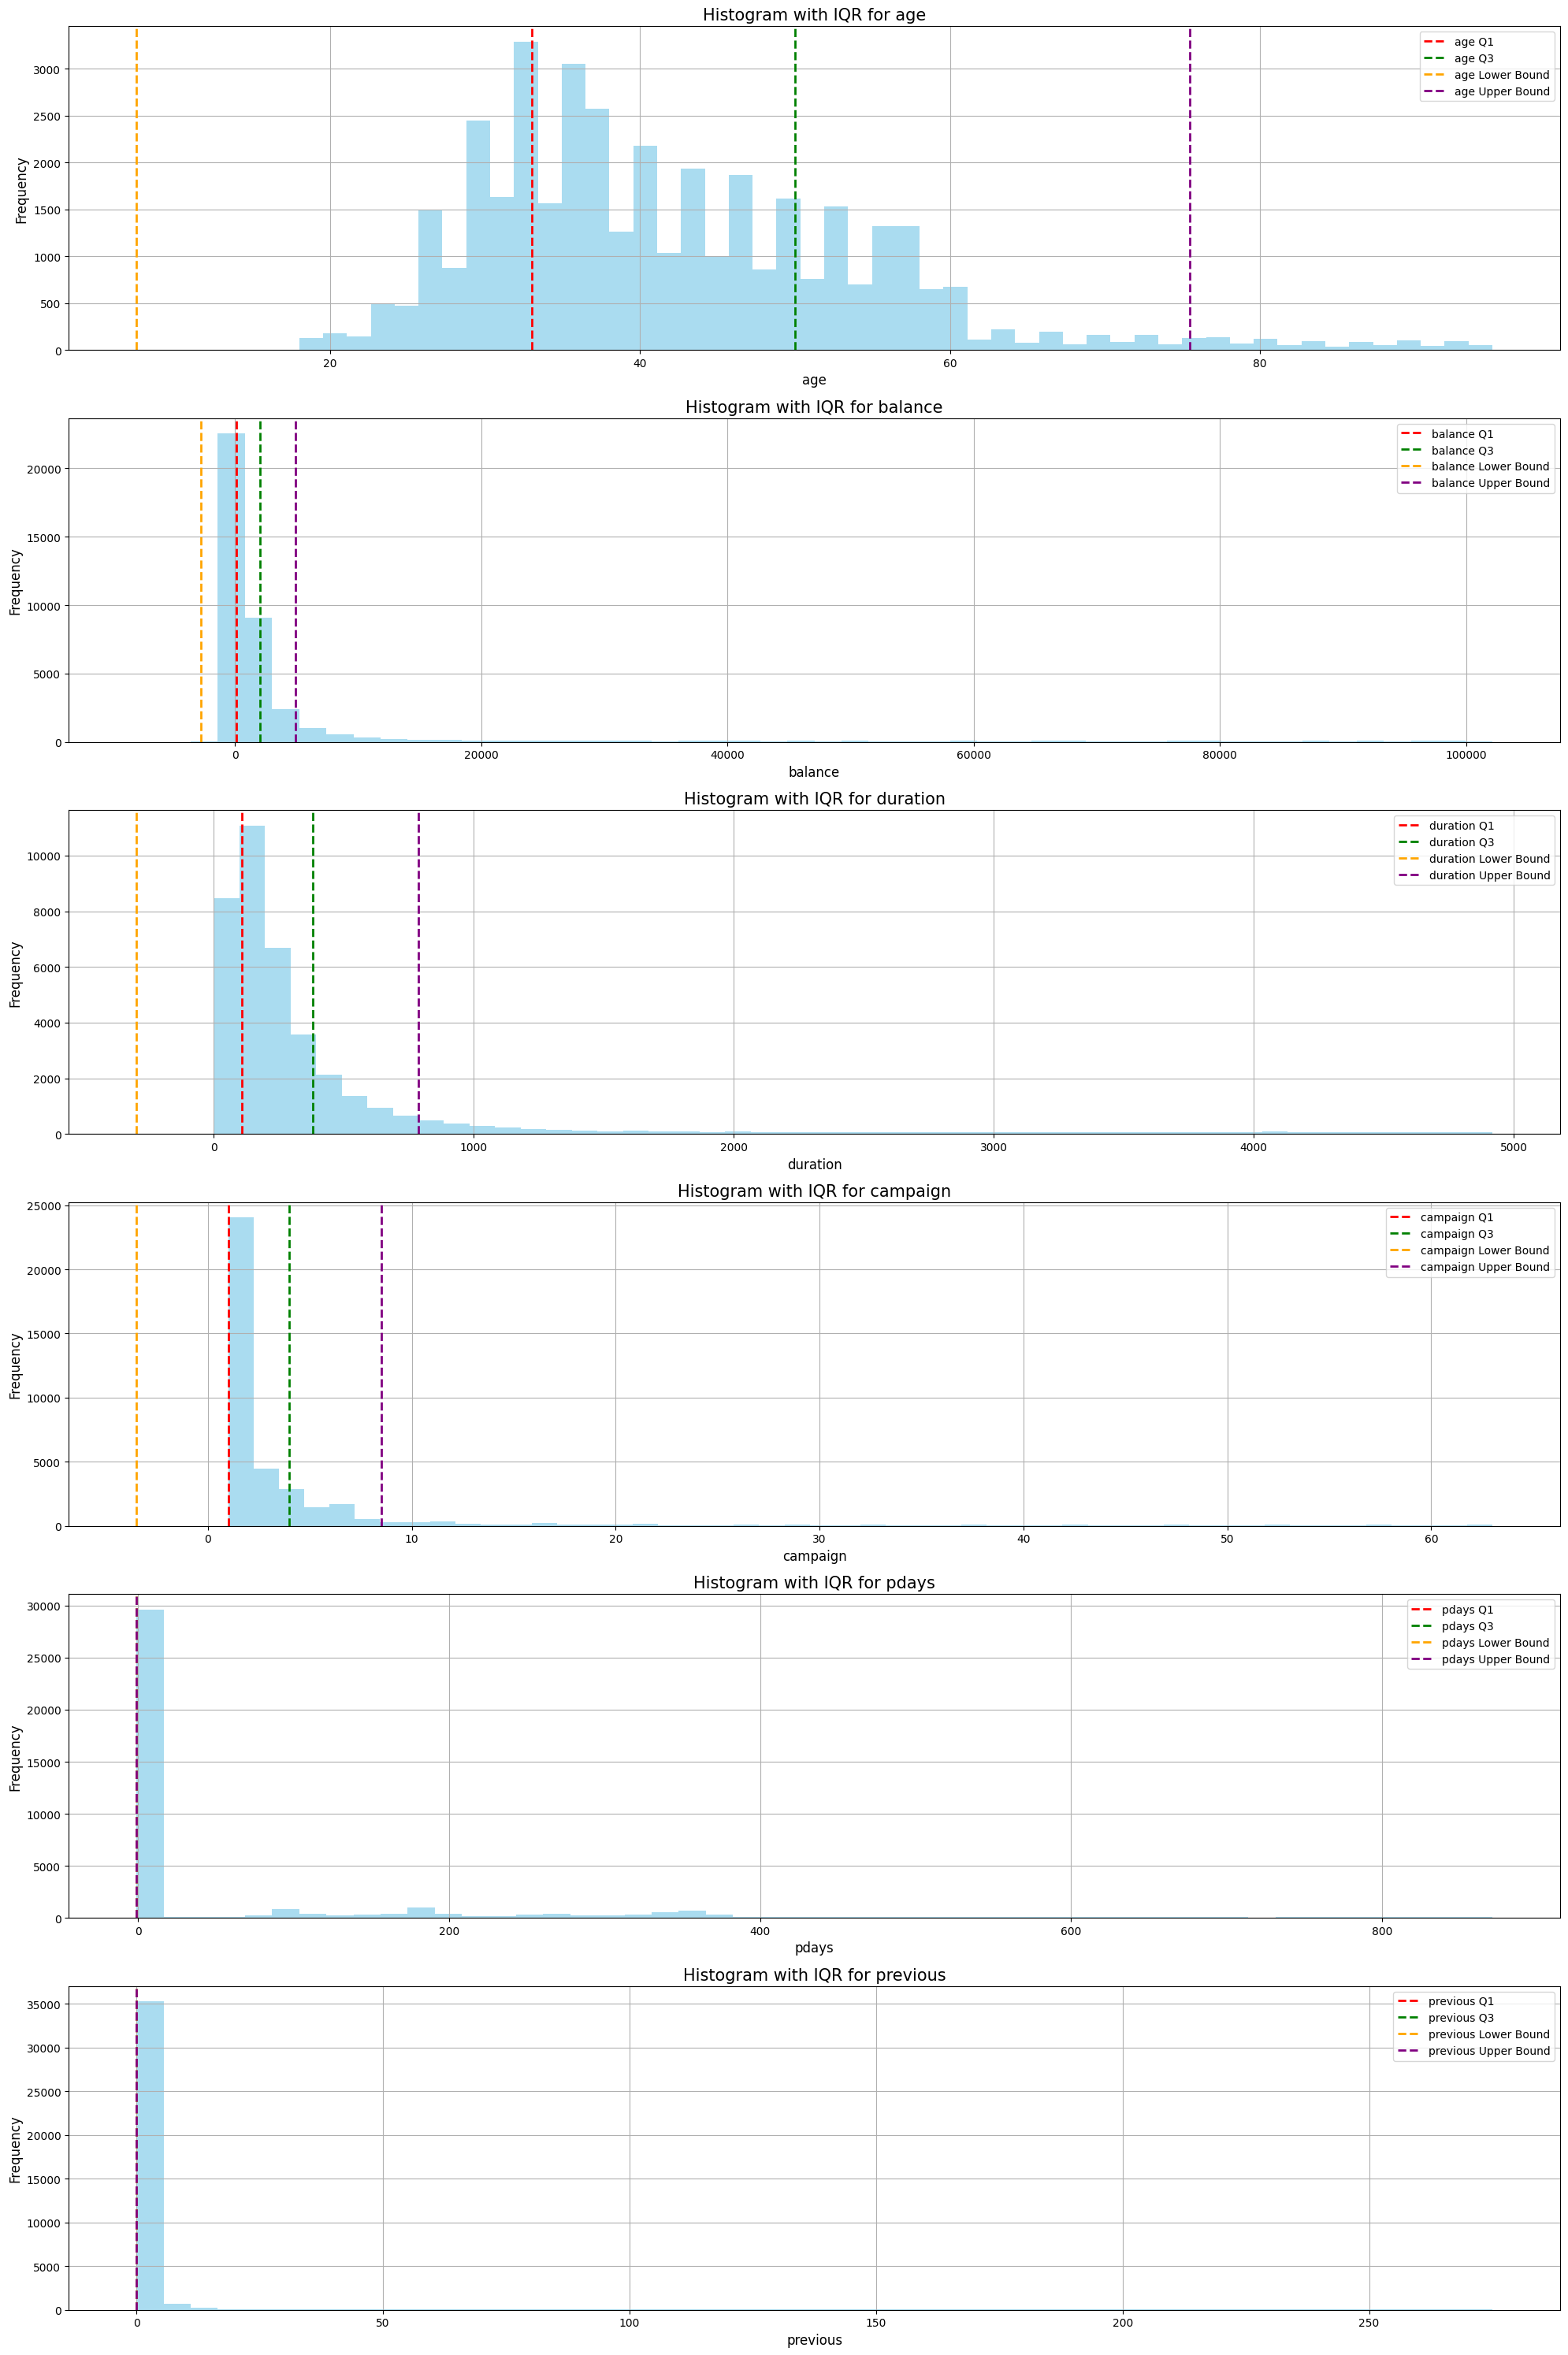

In [ ]:
# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(20, len(numerical_cols) * 5))

for idx, col in enumerate(numerical_cols):
    ax = axes[idx] # Get the specific subplot axis
    train[col].hist(bins=50, ax=ax, color='skyblue', alpha=0.7)  # Plot histogram

    Q1 = iqr_dict[col]['Q1']
    Q3 = iqr_dict[col]['Q3']
    IQR = Q3 - Q1
    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ax.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label=f'{col} Q1')
    ax.axvline(Q3, color='green', linestyle='dashed', linewidth=2, label=f'{col} Q3')
    ax.axvline(lower_bound, color='orange', linestyle='dashed', linewidth=2, label=f'{col} Lower Bound')
    ax.axvline(upper_bound, color='purple', linestyle='dashed', linewidth=2, label=f'{col} Upper Bound')


    ax.set_title(f'Histogram with IQR for {col}', fontsize=15)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The graph with IQR Range shows that a significant amount of outliers exist in numeerical columns like balance, campaign, pdays, previous and duration. Out of all this, the range of balance column is wide (which is caused by the presence of outliers). So In order to avoid this, the outliers are removed from Balance column.

### Skewness of the Distribution of the Numerical columns

In [ ]:
num = train.select_dtypes(include = 'int64').columns.tolist()
num

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# Importing the skew function from scipy.stats to calculate skewness
from scipy.stats import skew

# Looping through each numerical column in the list 'num'
for i in num:
    # Calculating skewness for the column 'i' and printing the result
    skewness = skew(train[i])
    if skewness > 1:
          types = 'Right'
    elif skewness  <1:
        types = 'Left'
    else:
        types = 'Normal'
    print(f'Skewness for {i}: {skewness}: {types}')  # Print the skewness value for each column


Skewness for age: 1.1242348167399974: Right
Skewness for balance: 4.06343156455544: Right
Skewness for duration: 3.7004433632115465: Right
Skewness for campaign: 3.8394456334458833: Right
Skewness for pdays: 2.6116735794332926: Right
Skewness for previous: 4.206411954597848: Right


Numerical Columns like **Balance, Duration, Campaign, Pdays and Previous** are highly skewed.

This was also seen by large number of Outliers present in them.

In Right Skewed Curves, **Mode < Median < Mean**. The Mean is sensitive to extreme values, So more skewed means more larger values exist in that particular column plot.

## Numerical Feature Changes

### Removing Outliers from Balance Feature

In [ ]:
from scipy.stats import zscore
z_scores = zscore(train['balance'])

# Set a threshold for Z-scores to consider an outlier
threshold = 3

# Filter out the outliers based on Z-scores
train = train[abs(z_scores) < threshold]

Due to outliers causing the range of the balance dataset to increase. I decided to remove the outliers.

### Converting Duration Seconds into Minutes

In [ ]:
train['duration'] = train['duration']/60

In [ ]:
test['duration'] = test['duration']/60

Due to duration being in seconds, its range increases and to simplify it, I converted it into minutes. Preserving the unit importance.

### Handling Numerical Colums with Negative values

#### Creating categorical columns of the pdays

In [ ]:
pdays_cat = [] # Append categorical values into a list
for i in train['pdays']:
    if int(i)<0:
        pdays_cat.append("negative values")
    elif i == 0:
        pdays_cat.append("zero")
    else:
        pdays_cat.append("positive")

In [ ]:
train['pdays_cat'] = pdays_cat # Adding the categorical column to the train dataset

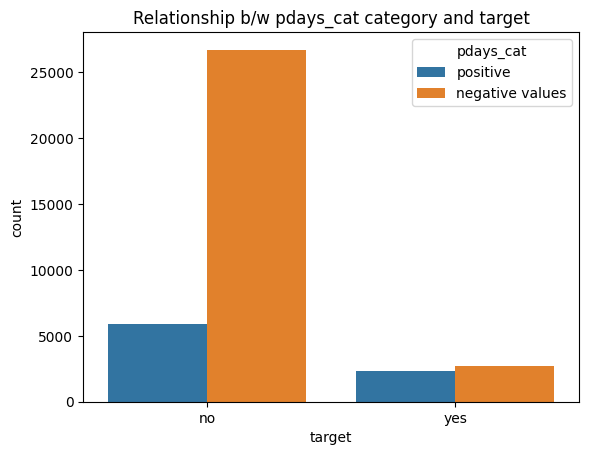

In [ ]:
sns.countplot(x='target',hue='pdays_cat',data=train)
plt.title("Relationship b/w pdays_cat category and target")
plt.show() # Plotting the relationship between Target and pdays_cat

It is clear that no zero value exist in pdays. **Converting the -1** value (which indicate that the person was never contacted before) **to zero** will make no affect.

In [ ]:
train = train.drop(columns = 'pdays_cat')

Dropping the column after analysis

In [ ]:
train.loc[train['pdays'] < 0, 'pdays'] = 0

In [ ]:
test.loc[test['pdays'] < 0, 'pdays'] = 0

Converting -1 present in pdays to 0 in above line of codes

#### Creating Categories for Balance Dataset

In [ ]:
balance_cat = []
for i in train['balance']:
    if int(i)<0:
        balance_cat.append("negative values")
    elif i == 0:
        balance_cat.append("zero")
    else:
        balance_cat.append("positive")

In [ ]:
train['balance_cat'] = balance_cat

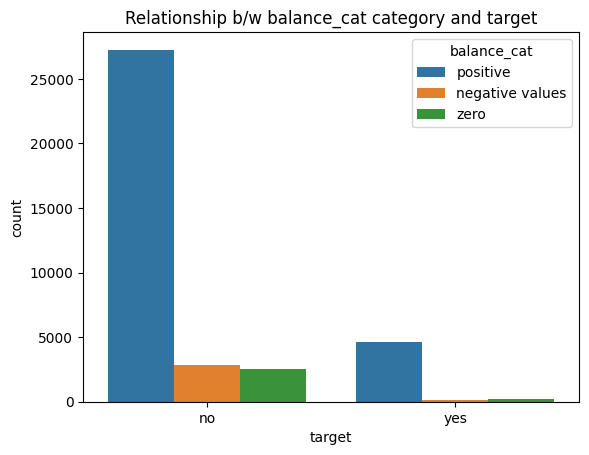

In [ ]:
sns.countplot(x='target',hue='balance_cat',data=train)
plt.title("Relationship b/w balance_cat category and target")
plt.show()

Number of zero balance is approx to number of negative balance. It is convenient to convert this negative values into zero as well.

In [ ]:
train = train.drop(columns = 'balance_cat')

In [ ]:
train.loc[train['balance'] < 0, 'balance'] = 0

In [ ]:
test.loc[test['balance'] < 0, 'balance'] = 0

Converted negative values to zero in balanced dataset

### PieChart of the Categorical Features including the Target

In [ ]:
cat = train.select_dtypes(include = 'object').columns.tolist()


In [ ]:
cat.remove('last contact date')

In [ ]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'target']

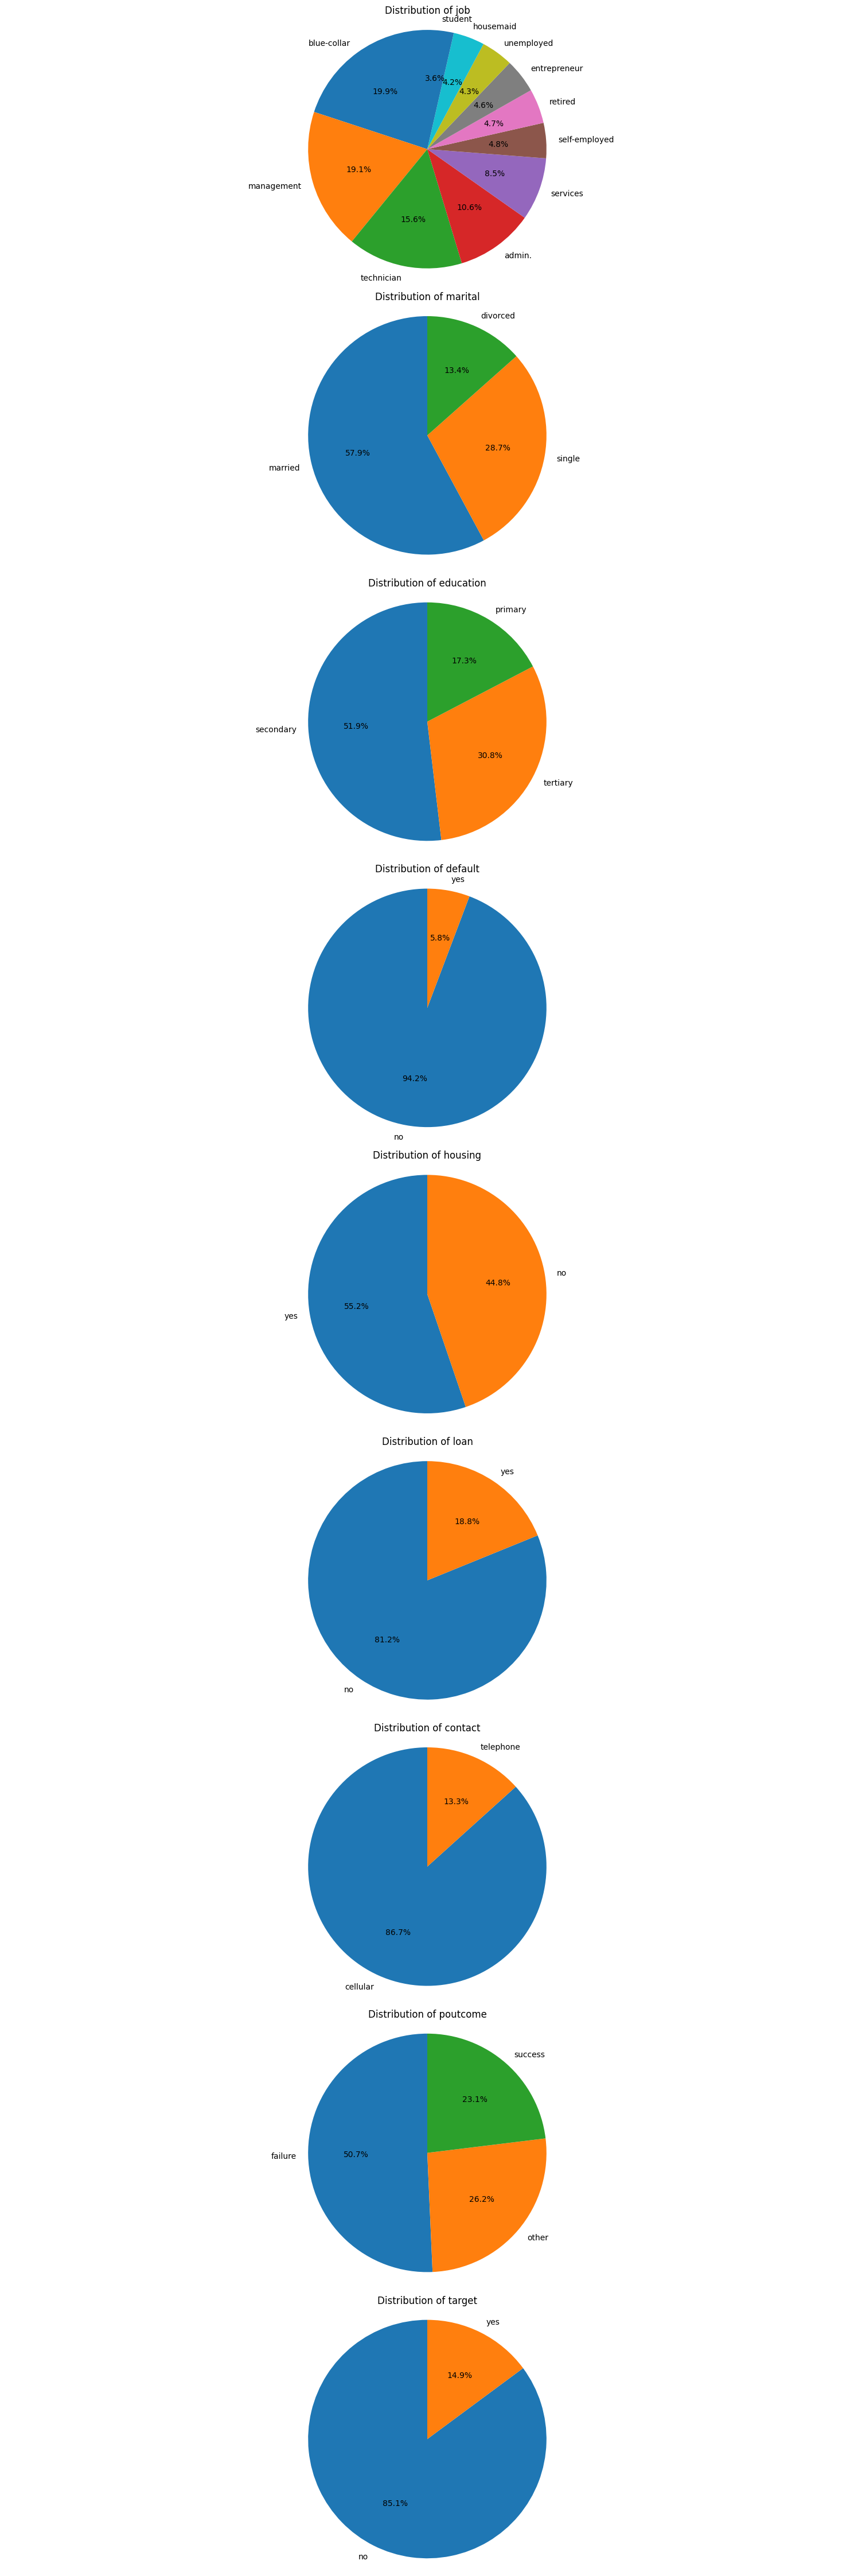

In [ ]:

n = len(cat)  # Number of categorical columns
plt.figure(figsize=(15, 5 * n))

# Loop through each categorical column and create a pie chart
for idx, column in enumerate(cat):
    plt.subplot(n, 1, idx + 1)  # Create a subplot for each categorical column
    category_counts = train[column].value_counts()  # Count occurrences of each category

    plt.pie(
        category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')  # Equal aspect ratio for circular pie charts

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display all pie charts


The high percentage of No Category in the Target variable shows the dataset is imbalanced.

### Comparison between Target and Categorical Columns

All the categorical columns are compared witht the target in this section to understand the distribution of Yes/No with other categories

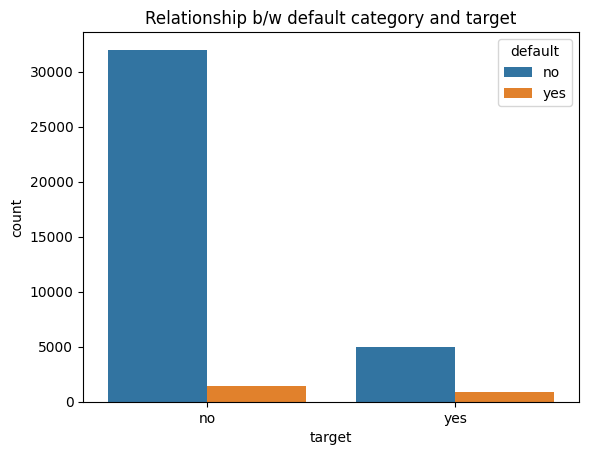

In [ ]:
sns.countplot(x='target',hue='default',data=train)
plt.title("Relationship b/w default category and target")
plt.show()

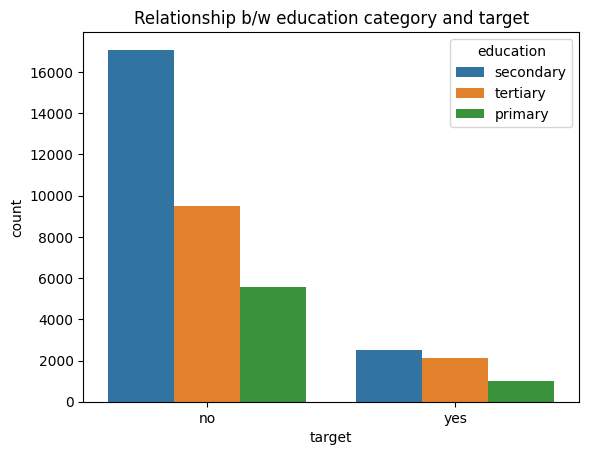

In [ ]:
sns.countplot(x='target',hue='education',data=train)
plt.title("Relationship b/w education category and target")
plt.show()

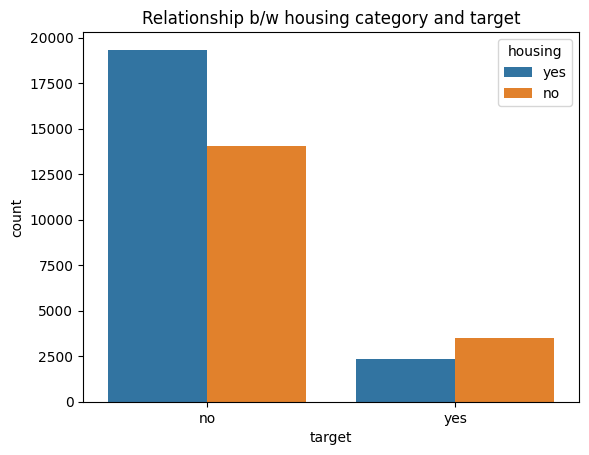

In [ ]:
sns.countplot(x='target',hue='housing',data=train)
plt.title("Relationship b/w housing category and target")
plt.show()

Most of the people who have no housing said yes to the product. This is something interesting.

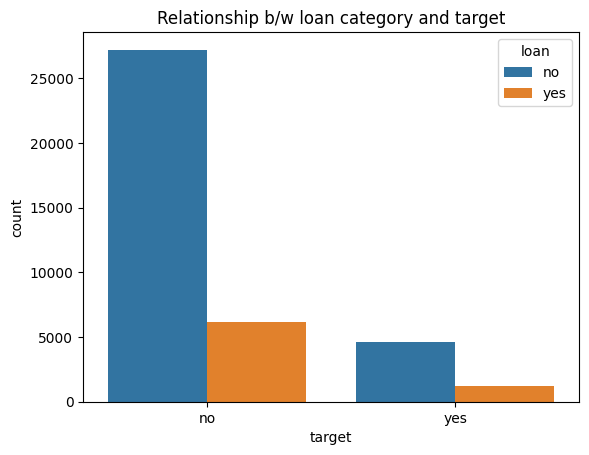

In [ ]:
sns.countplot(x='target',hue='loan',data=train)
plt.title("Relationship b/w loan category and target")
plt.show()

In [ ]:
train['poutcome'] = train['poutcome'].fillna('unknown')

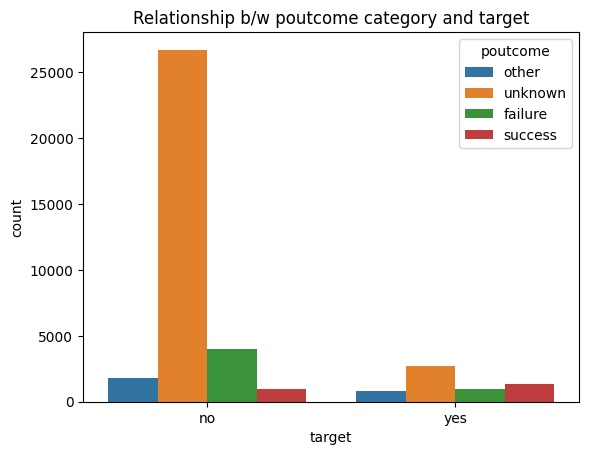

In [ ]:
sns.countplot(x='target',hue='poutcome',data=train)
plt.title("Relationship b/w poutcome category and target")
plt.show()

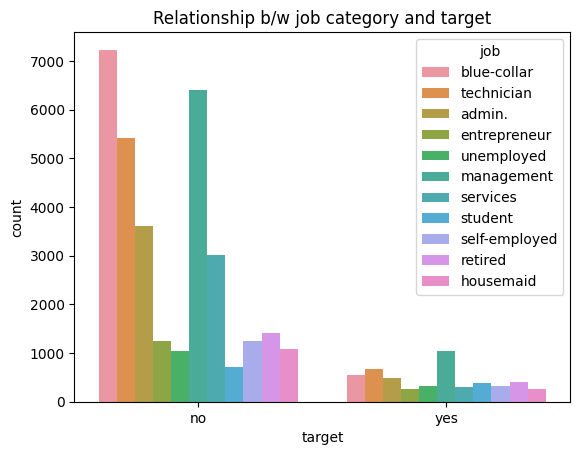

In [ ]:
sns.countplot(x='target',hue='job',data=train)
plt.title("Relationship b/w job category and target")
plt.show()

The Trend of categories is approx same for both 'Yes' and 'No' Targets. This signifies that each categorical column is important.

## Pivot Tables

This section is done just to compare the Balance column with other categorical columns.

It was done because to know the trend after the outliers have been removed.

### Balance vs Categorical Column

In [ ]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'target']

In [ ]:
pivot_df = pd.pivot_table(train, values="balance", index= ['job'],
                          aggfunc=lambda x: round(x.mean(), 2), fill_value=0)

print(pivot_df)

               balance
job                   
admin.         1117.02
blue-collar    1115.94
entrepreneur   7278.92
housemaid      7946.06
management     1763.21
retired        1882.28
self-employed  7275.29
services       1007.87
student        8888.98
technician     1272.04
unemployed     7643.78


One more interesting thing I found about the balance section is the distribution of average balance among Students, Unemployed, Self-employed, Housemaid is high compare to jobs of Management, Services, Blue collar.

In [ ]:
pivot_df = pd.pivot_table(train, values="balance", index= ['marital'],
                          aggfunc=lambda x: round(x.mean(), 2), fill_value=0)

print(pivot_df)

          balance
marital          
divorced  4565.94
married   2022.21
single    2609.40


In [ ]:
pivot_df = pd.pivot_table(train, values="balance", index= 'target',
                          aggfunc=lambda x: round(x.mean(), 2), fill_value=0)

print(pivot_df)

        balance
target         
no      1979.48
yes     5944.64


In [ ]:
pivot_df = pd.pivot_table(train, values="balance", index= ['poutcome'],
                          aggfunc=lambda x: round(x.mean(), 2), fill_value=0)

print(pivot_df)

           balance
poutcome          
failure    4571.61
other      8475.23
success   10160.14


In [ ]:
pivot_df = pd.pivot_table(train, values="balance", index= [
 'housing','loan','default'],
                          aggfunc=lambda x: round(x.median(), 2), fill_value=0)

print(pivot_df)

                      balance
housing loan default         
no      no   no         623.0
             yes       5295.0
        yes  no         348.0
             yes      11538.0
yes     no   no         471.0
             yes        439.0
        yes  no         327.5
             yes      14338.0


### Managing Date and Time

In [ ]:
# Convert the 'last contact date' column to datetime format
train['last contact date'] = pd.to_datetime(train['last contact date'])

# Extract the year from the 'last contact date' and create a new column 'year'
train['year'] = train['last contact date'].dt.year

# Extract the month from the 'last contact date' and create a new column 'month'
train['month'] = train['last contact date'].dt.month

# Extract the weekday from the 'last contact date' and create a new column 'weekday'
# Note: Monday=0, Sunday=6
train['weekday'] = train['last contact date'].dt.weekday
train.drop(columns=['last contact date'],inplace=True)

In [ ]:
# Convert the 'last contact date' column to datetime format in the test dataset
test['last contact date'] = pd.to_datetime(test['last contact date'])

# Extract the year from the 'last contact date' and create a new column 'year'
test['year'] = test['last contact date'].dt.year

# Extract the month from the 'last contact date' and create a new column 'month'
test['month'] = test['last contact date'].dt.month

# Extract the weekday from the 'last contact date' and create a new column 'weekday'
# Note: Monday=0, Sunday=6
test['weekday'] = test['last contact date'].dt.weekday
test.drop(columns=['last contact date'],inplace=True)

Monday- 0 Sunday - 6

### Barplot for Year, Month, Weekday

#### For Year

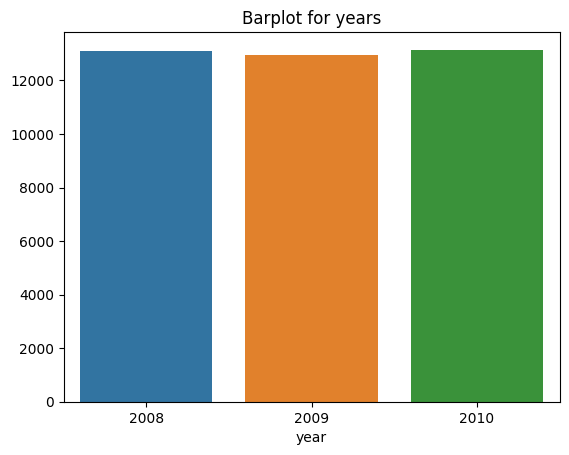

In [ ]:
year = train['year'].value_counts().sort_index()

sns.barplot(x=year.index,y=year.values)
plt.title("Barplot for years")
plt.show()

There is an uniformity in the Year Column

#### For Month

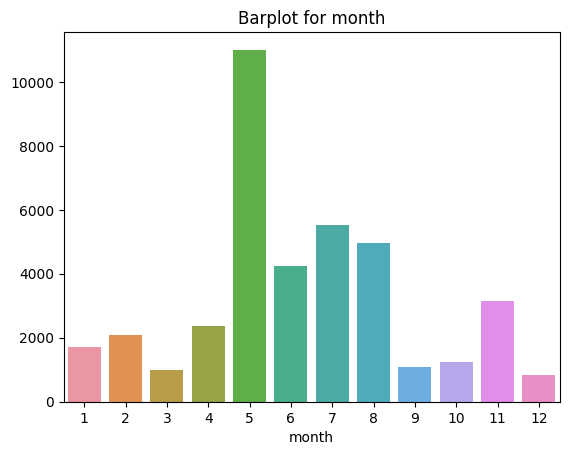

In [ ]:
month= train['month'].value_counts().sort_index()

sns.barplot(x=month.index,y=month.values)
# plt.xticklabels(['jan','feb','mar','apr'])
plt.title("Barplot for month")
plt.show()

### For Weekdays

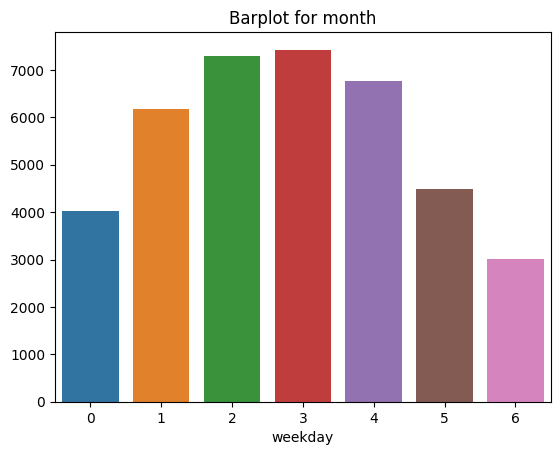

In [ ]:
days  = train['weekday'].value_counts().sort_index()

sns.barplot(x=days.index,y=days.values)
plt.title("Barplot for month")
plt.show()


**Monday - 0   Sunday - 6**


### Dropping Irrevelavant Columns

In [ ]:
train = train.drop(columns = ['year'])

In [ ]:
test = test.drop(columns = ['year'])

### Insights from EDA

1) The dataset has 15 columns/ features.
2) Out of those 15, 8 are Categorical, 6 are Numeric, and 1 is date and time.
3) Around 75% of the values in poutcome are missing.
4) In Numerical columns, after doing statistical analysis I found.
4.1) The standard deviation of balance column is high, indicating a high range of spread.
For simplicity, the outliers have been removed to reduce the S.D
4.2) Average duration call is of 7 minutes. To simplify, the seconds unit is converted to minutes.
4.3) Most of the clients contacted were new around 75%
4.4) A Threshold of 11 unique values is kept to distinguish Numerical and Categorical columns.
5) Drawn Histograms along with upper and lower bounds to know the distribution of outliers itself on graph.
6) Numerical columns are highly right skewed
7) Converted the negative values in pdays and balance to 0 for simplicity
8) Data is Imbalance because the Target No is high compared to Yes
9) There is uniformity in trends when Categorical columns are compared with Target- except in one case of 'Housing vs Target' where people having no house has said more Yes to the campaign.
10) I compared the Balance column with categorical columns and found something interesting when Job vs Balance is compared
Here job categories like Student, Unemployed and Housemaid have a high amount of average balance compared to management, entrepreneur, services, blue collar etc.

11) The last contact date was converted into Year, Month and Weekdays.

12) Using Barplot, it was discovered that there is a significant trend in Month and Weekdays column with number of people contacted while in year, it's uniform showing almost equal number of people were contacted in 2008, 2009, 2010.

## Split the train dataset

In [ ]:
train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,month,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,5.950000,2,331,1,other,no,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,2.666667,1,0,0,NaN,no,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,5.433333,1,0,0,NaN,no,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,1.733333,3,0,0,NaN,no,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,7.416667,2,0,0,NaN,no,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31,technician,single,secondary,no,0,yes,no,cellular,0.266667,34,0,0,NaN,no,7,3
39207,59,admin.,married,primary,no,6187,no,no,cellular,1.900000,4,0,0,NaN,no,7,4
39208,36,blue-collar,married,secondary,no,63,yes,no,NaN,0.933333,8,0,0,NaN,no,6,0
39209,28,student,single,secondary,no,5916,no,no,cellular,1.550000,5,0,0,NaN,no,3,5


### Splitting the train into Train and Validation

In [ ]:
X = train.drop(columns = ['target'])
y = train['target']

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,5.950000,2,331,1,other,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,2.666667,1,0,0,NaN,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,5.433333,1,0,0,NaN,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,1.733333,3,0,0,NaN,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,7.416667,2,0,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31,technician,single,secondary,no,0,yes,no,cellular,0.266667,34,0,0,NaN,7,3
39207,59,admin.,married,primary,no,6187,no,no,cellular,1.900000,4,0,0,NaN,7,4
39208,36,blue-collar,married,secondary,no,63,yes,no,NaN,0.933333,8,0,0,NaN,6,0
39209,28,student,single,secondary,no,5916,no,no,cellular,1.550000,5,0,0,NaN,3,5


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
39206     no
39207     no
39208     no
39209     no
39210    yes
Name: target, Length: 37685, dtype: object

In [ ]:
len(X.columns)

16

### Train - Validation Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,month,weekday
11002,35,management,single,secondary,no,6809,yes,no,telephone,139,8,273,7,failure,2,4
16008,54,self-employed,single,tertiary,no,384,no,yes,cellular,200,1,-1,0,unknown,5,3
24722,21,student,single,secondary,no,216,no,no,cellular,414,1,-1,0,unknown,8,3
1722,32,self-employed,single,tertiary,no,12269,no,no,NaN,141,1,-1,0,unknown,5,5
21374,41,admin.,married,secondary,no,0,yes,yes,NaN,55,2,-1,0,unknown,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,52,management,married,secondary,no,428,yes,no,NaN,153,1,-1,0,unknown,5,4
23322,28,entrepreneur,divorced,primary,no,13505,yes,yes,cellular,1143,28,708,84,other,1,4
3638,37,technician,married,secondary,no,1580,no,no,cellular,92,12,-1,0,unknown,8,6
20677,28,admin.,married,secondary,no,423,yes,no,cellular,245,1,-1,0,unknown,7,2


## Data Preprocessing

In [ ]:
col = X_train.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'month', 'weekday'],
      dtype='object')

### Label Encoding the Categorical variables

In [ ]:
cat_col = list(X_train.select_dtypes(include=['object']).columns) # Create a list of 'object' datatype column
for i in cat_col:
    enc = LabelEncoder() # Create a new instance of the LabelEncoder
    X_train[i] = enc.fit_transform(X_train[i])  # Fit the LabelEncoder to the training data
    X_val[i] = enc.transform(X_val[i]) # Transform the corresponding validation data
    test[i] = enc.transform(test[i]) # Transform the test data

### Applying the Iterative Imputer for filling the missing values

In [ ]:
imputer = IterativeImputer() # Create a new instance of the Iterative Imputer
X_train_trans = imputer.fit_transform(X_train)
X_val_trans = imputer.transform(X_val)
test_trans = imputer.transform(test)

X_train_imputed = pd.DataFrame(X_train_trans,columns=col)
X_val_imputed = pd.DataFrame(X_val_trans,columns=col)
test_imputed = pd.DataFrame(test_trans, columns = col)  #These all are imputed datasets


In [ ]:
cc = X.select_dtypes(include = 'object').columns.tolist()
cc

## cc represent the categorical columns of the X dataset

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [ ]:
nc = X.select_dtypes(include = ['float64','int64']).columns.tolist()
nc

## nc represent the numerical columns of the X dataset

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

### Creating Pipelines

For Numerical Columns

In [ ]:
num_pipe = Pipeline([
  ('scaler', MinMaxScaler())
 ])
num_pipe

Pipeline(steps=[('scaler', MinMaxScaler())])

For Categorical Columns

In [ ]:
cat_pipe = Pipeline([
   ('encoder', OneHotEncoder(handle_unknown = 'ignore'))])
cat_pipe

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

Creating Column Transformer

In [ ]:
Transformer = ColumnTransformer(transformers = [('numerical',num_pipe,nc),
                                ('categorical',cat_pipe,cc)],remainder='passthrough')
Transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'pdays', 'previous']),
                                ('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'poutcome'])])

Applying the Column Transformer to the imputed datasets

In [ ]:
X_train_final = pd.DataFrame(Transformer.fit_transform(X_train_imputed),columns=Transformer.get_feature_names_out())
X_val_final = pd.DataFrame(Transformer.transform(X_val_imputed),columns = Transformer.get_feature_names_out())

### Applying SMOTE (Synthetic Minority Oversampling Technique)

SMOTE creates synthetic samples for the minority class.

Uses the nearest neighbor algorithm to interpolate between a minority sample and one of its closest neighbors

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42) # Applying SMOTE to address class imbalance

X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)
# X_train_smote: Resampled training features
# y_train_smote: Resampled training labels with balanced class distribution

In [ ]:
X_train_smote

,numerical__age,numerical__balance,numerical__duration,numerical__campaign,numerical__pdays,numerical__previous,categorical__job_0.0,categorical__job_1.0,categorical__job_2.0,categorical__job_3.0,...,categorical__loan_1.0,categorical__contact_0.0,categorical__contact_1.0,categorical__contact_2.0,categorical__poutcome_0.0,categorical__poutcome_1.0,categorical__poutcome_2.0,categorical__poutcome_3.0,remainder__month,remainder__weekday
0,0.376623,0.224646,0.224278,0.032258,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,7.0,2.000000
1,0.194805,0.001761,0.006100,0.080645,0.000000,0.000000,0.0,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,5.0,4.000000
2,0.168831,0.018621,0.020333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
3,0.233766,0.000000,0.024603,0.032258,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,7.0,3.000000
4,0.324675,0.043553,0.064254,0.016129,0.303100,0.007273,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,4.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52215,0.745004,0.124302,0.387645,0.090882,0.315335,0.437335,0.0,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.469556,0.530444,0.000000,1.0,6.000000
52216,0.623548,0.007391,0.064339,0.016129,0.000000,0.000000,0.0,0.165934,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,7.0,3.000000
52217,0.288939,0.033623,0.219753,0.016129,0.000000,0.000000,0.0,1.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,7.0,3.062071
52218,0.198399,0.006742,0.090008,0.000000,0.000000,0.000000,0.0,0.019766,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,2.0,2.000000


In [ ]:
X_val_final

,numerical__age,numerical__balance,numerical__duration,numerical__campaign,numerical__pdays,numerical__previous,categorical__job_0.0,categorical__job_1.0,categorical__job_2.0,categorical__job_3.0,...,categorical__loan_1.0,categorical__contact_0.0,categorical__contact_1.0,categorical__contact_2.0,categorical__poutcome_0.0,categorical__poutcome_1.0,categorical__poutcome_2.0,categorical__poutcome_3.0,remainder__month,remainder__weekday
0,0.142857,0.008843,0.016063,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
1,0.129870,0.000000,0.051037,0.032258,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0
2,0.246753,0.023556,0.050020,0.016129,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.324675,0.000000,0.024807,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0
4,0.207792,0.000367,0.053274,0.016129,0.000000,0.000000,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532,0.545455,0.075585,0.085807,0.016129,0.000000,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0
7533,0.532468,0.031610,0.007930,0.032258,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
7534,0.246753,0.003045,0.027450,0.032258,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,1.0
7535,0.480519,0.001046,0.032940,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0


## Model Training

### Labeling Target

In [ ]:
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_val = label.transform(y_val)
y_train_smote = label.fit_transform(y_train_smote)

**Used LabelEncoder to transform Yes/No into Binary [0,1]**

### Logistic Regression Model

In [ ]:
logistic_model = LogisticRegression(random_state = 42)
logistic_model #Build a simple Logistic Regression Model

LogisticRegression(random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
logistic_model.fit(X_train_smote, y_train_smote) #Fittting the model on SMOTE train dataset
y_pred_logistic = logistic_model.predict(X_val_final) #Predicting the validation dataset
print(classification_report(y_val, y_pred_logistic)) #Classification Report

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      6528
           1       0.42      0.70      0.52      1009

    accuracy                           0.83      7537
   macro avg       0.68      0.77      0.71      7537
weighted avg       0.88      0.83      0.84      7537



### XgBoost Classifier Model

In [ ]:
XgBoost_model = XGBClassifier(random_state = 42)
XgBoost_model #Build a simple XgBoost Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
XgBoost_model.fit(X_train_smote, y_train_smote)
y_pred_XgBoost = XgBoost_model.predict(X_val_final)
print(classification_report(y_val, y_pred_XgBoost))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6528
           1       0.54      0.52      0.53      1009

    accuracy                           0.88      7537
   macro avg       0.73      0.73      0.73      7537
weighted avg       0.87      0.88      0.87      7537



### LGBM Classifier Model

In [ ]:
lgbm_model = LGBMClassifier(random_state = 42, verbose = -1)
lgbm_model #Build a LightGBM Model

LGBMClassifier(random_state=42, verbose=-1)

In [ ]:
lgbm_model.fit(X_train_smote, y_train_smote)
y_pred_lgbm = lgbm_model.predict(X_val_final)
auc_score_lr = roc_auc_score(y_val, y_pred_lgbm)
print(classification_report(y_val,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6528
           1       0.52      0.60      0.56      1009

    accuracy                           0.87      7537
   macro avg       0.73      0.76      0.74      7537
weighted avg       0.88      0.87      0.88      7537



### Decision Tree Model

In [ ]:
DT_model = DecisionTreeClassifier(random_state = 10)
DT_model #Build a Decision Tree Model

DecisionTreeClassifier(random_state=10)

In [ ]:
DT_model.fit(X_train_smote, y_train_smote)
y_pred_dt = DT_model.predict(X_val_final)
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6528
           1       0.42      0.51      0.46      1009

    accuracy                           0.84      7537
   macro avg       0.67      0.70      0.68      7537
weighted avg       0.86      0.84      0.85      7537



### Random Forest Classifier Classifier

In [ ]:

Random_Forest_model = RandomForestClassifier(random_state = 42)
Random_Forest_model #Build a Random Forest Model

RandomForestClassifier(random_state=42)

In [ ]:
Random_Forest_model.fit(X_train_smote, y_train_smote)
y_pred_rf = Random_Forest_model.predict(X_val_final)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6528
           1       0.50      0.57      0.54      1009

    accuracy                           0.87      7537
   macro avg       0.72      0.74      0.73      7537
weighted avg       0.87      0.87      0.87      7537



### Support Vector Classifier

In [ ]:
SVC_model = SVC(random_state = 42)
SVC_model #Build a simple Support Vector Classifier

SVC(random_state=42)

In [ ]:
SVC_model.fit(X_train_smote, y_train_smote)
y_pred_svc = SVC_model.predict(X_val_final)
print(classification_report(y_val, y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6528
           1       0.43      0.73      0.54      1009

    accuracy                           0.83      7537
   macro avg       0.69      0.79      0.72      7537
weighted avg       0.88      0.83      0.85      7537



### K Nearest Neighbor

In [ ]:
KNN_model = KNeighborsClassifier()
KNN_model #Build a K Nearest Classifier model

KNeighborsClassifier()

In [ ]:
KNN_model.fit(X_train_smote,y_train_smote)
y_pred_knn = KNN_model.predict(X_val_final)
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6528
           1       0.37      0.57      0.45      1009

    accuracy                           0.81      7537
   macro avg       0.65      0.71      0.67      7537
weighted avg       0.85      0.81      0.83      7537



## Comparison of Models

### Comparing Models without Hyperameter Tuning

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


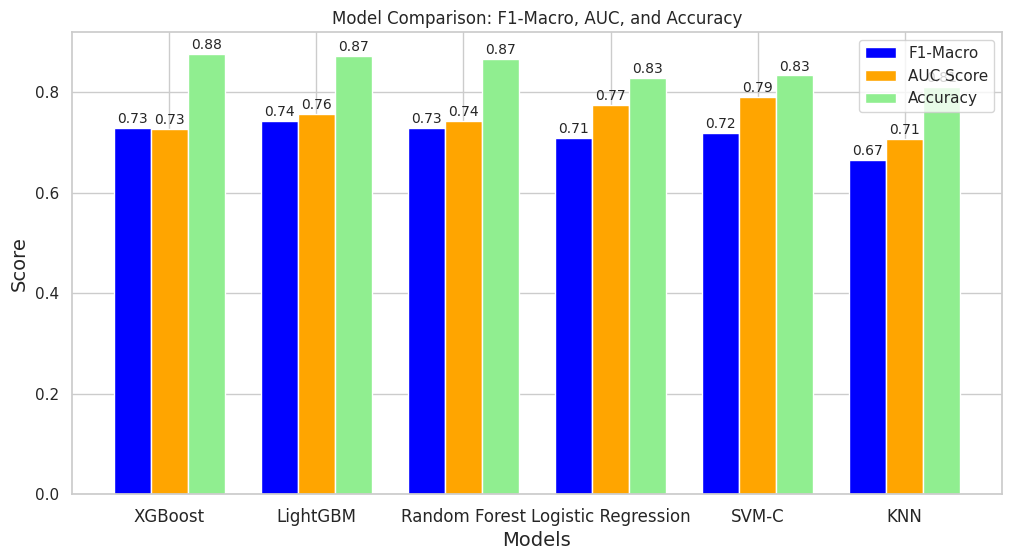

In [ ]:

model1 = XGBClassifier(random_state = 42) # XGBoost classifier
model2 = LGBMClassifier(verbose=-1, random_state = 42) # LightGBM classifier
model3 = RandomForestClassifier(random_state = 42) # Random Forest classifier
model4 = LogisticRegression(random_state = 42) # Logistic Regression
model5 = SVC(random_state = 42) # Support Vector Classifier
model6 = KNeighborsClassifier()  # k-Nearest Neighbors classifier
models = [model1, model2, model3, model4, model5,model6]
model_names = ['XGBoost', 'LightGBM', 'Random Forest', 'Logistic Regression','SVM-C','KNN']

f1_scores = []
auc_scores = []
accuracies = []

for model in models:
    model.fit(X_train_smote, y_train_smote) #Train on SMOTE Dataset
    y_pred = model.predict(X_val_final) # Predict on Validation Dataset
    f1 = f1_score(y_val, y_pred, average='macro')  # Macro F1 score
    accuracy = accuracy_score(y_val, y_pred)  # Accuracy
    auc = roc_auc_score(y_val, y_pred)  # AUC score

    f1_scores.append(f1)
    auc_scores.append(auc)
    accuracies.append(accuracy)

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(model_names))
width = 0.25

ax.bar([i - width for i in x], f1_scores, width, label='F1-Macro', color='blue')
ax.bar(x, auc_scores, width, label='AUC Score', color='orange')
ax.bar([i + width for i in x], accuracies, width, label='Accuracy', color='lightgreen')

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Model Comparison: F1-Macro, AUC, and Accuracy', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12)
ax.legend(loc='best')

for i in x:
    ax.text(i - width, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', fontsize=10)
    ax.text(i, auc_scores[i] + 0.01, f'{auc_scores[i]:.2f}', ha='center', fontsize=10)
    ax.text(i + width, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', fontsize=10)

plt.show()

This bar chart compares five machine learning models based on three metrics: **F1-Macro**, **AUC Score**, and **Accuracy**.

1. **Top-performing Models* LGBM
2. * - **LightGBM** and **Random Forest Logistic Regression** performed similarly, with the highest Accuracy (0.87) and competitive F1-Macro and AUC scor LightGBM has high F1 Macro score.
e  - These models are strong candidates for tasks requiring both precision and recall balanc4.

2. **SVM-C (Support Vector Machine with Regularization)**:
   - This model achieved an Accuracy of 0.83 and moderate AUC and F1-Macro.
     o5est.

3. **XGBoost**:
   - XGBoost's Accuracy and F1-Macro scores are 0.73, indicating balanced but slightly lower performance compared to LightGBM or Randrf6rmance.

4. **KNN (K-Nearest Neighbors)**:
   - KNN has the lowest Accuracy (0.71) and F1-Macro (0.67) among all models, indicating that it may not be the best choice for7this task.

5. **General Observations**:
   - LightGBM and Random Forest Logistic Regression provide the best balance of metrics, making them ideal for applications that prioritize both classification effectiveness and reliability.
   - KNN struggles in terms of both F1-Macro and AUC, suggesting it might not capture data relationships as well as the red as alternatives.

### Cross Validation Score of all models

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'SVM': SVC(random_state = 42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state = 42),
    'LGBM Model': LGBMClassifier(verbose=-1, random_state = 42)
}

# Dictionary to store the cross-validation scores for each model
cv_scores = {}

# Loop through each model, perform cross-validation, and store the results
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')  # 5-fold cross-validation
    cv_scores[model_name] = scores.mean()  # Store mean CV score for each model

# Print the cross-validation scores for all models
for model_name, score in cv_scores.items():
    print(f"{model_name}: {score:.4f}")

Logistic Regression: 0.8209
Random Forest: 0.9291
SVM: 0.8436
KNN: 0.8657
XGBoost: 0.8921
LGBM Model: 0.8845


Mean of F1 Macro on Ensemble Models is high as compared to Baseliner Models

### RFE for the Best Model - LightGBM

In [ ]:
lgbm_selector = RFE(LGBMClassifier(random_state = 42, verbose = -1,),n_features_to_select=20)

X_train_lgbm= pd.DataFrame(lgbm_selector.fit_transform(X_train_smote, y_train_smote),columns=X_train_final.columns[lgbm_selector.get_support()])
X_val_lgbm = pd.DataFrame(lgbm_selector.transform(X_val_final),columns=X_val_final.columns[lgbm_selector.get_support()])

In [ ]:
X_train_lgbm

,numerical__age,numerical__balance,numerical__duration,numerical__campaign,numerical__pdays,numerical__previous,categorical__job_0.0,categorical__job_6.0,categorical__job_8.0,categorical__marital_1.0,categorical__education_0.0,categorical__education_2.0,categorical__housing_0.0,categorical__loan_0.0,categorical__contact_0.0,categorical__contact_2.0,categorical__poutcome_1.0,categorical__poutcome_2.0,remainder__month,remainder__weekday
0,0.376623,0.224646,0.224278,0.032258,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,7.0,2.000000
1,0.194805,0.001761,0.006100,0.080645,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,5.0,4.000000
2,0.168831,0.018621,0.020333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,1.0,1.000000
3,0.233766,0.000000,0.024603,0.032258,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,7.0,3.000000
4,0.324675,0.043553,0.064254,0.016129,0.303100,0.007273,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,4.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52215,0.745004,0.124302,0.387645,0.090882,0.315335,0.437335,0.0,0.469556,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.469556,0.530444,1.0,6.000000
52216,0.623548,0.007391,0.064339,0.016129,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,7.0,3.000000
52217,0.288939,0.033623,0.219753,0.016129,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,7.0,3.062071
52218,0.198399,0.006742,0.090008,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,2.0,2.000000


In [ ]:
lgbm_model =LGBMClassifier(random_state = 42, verbose = -1,)

In [ ]:
lgbm_model.fit(X_train_lgbm, y_train_smote)
y_pred_lgbm = lgbm_model.predict(X_val_lgbm)
auc_score_lr = roc_auc_score(y_val, y_pred_lgbm)
print(classification_report(y_val,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6528
           1       0.54      0.60      0.57      1009

    accuracy                           0.88      7537
   macro avg       0.74      0.76      0.75      7537
weighted avg       0.88      0.88      0.88      7537



## Hyperparameter Tuning of Best Model
### The Model which gave the best output in my Model Building - LightGBM

In [ ]:
lgbm_model = LGBMClassifier(verbose = -1, random_state = 42)

The LGBMClassifier was considered after evaluating all models in earlier section of Model Comparison

### Defining the Parameter Grid

In [ ]:
# The Parameter Grid for the LGBMClassifier is as follows:
params= {
  'learning_rate': [0.01, 0.05, 0.1],     # Learning rate
    'n_estimators': [100, 200, 500],      # Number of boosting rounds
    'num_leaves': [30, 50, 100],          # Number of leaves in a tree
    'max_depth': [5, 8, 10],              # Maximum depth of a tree
    'min_data_in_leaf': [20, 30, 50],     # Minimum number of data points in a leaf
    'subsample': [0.7, 0.8, 1.0],         # Fraction of data to use for each tree
    'colsample_bytree': [0.7, 0.8, 1.0]   # Fraction of features to use per tree
}

### Doing RandomizedSearchCV

In [ ]:
# Used RandomizedSearchCV
random_search = RandomizedSearchCV(lgbm_model, param_distributions=params,
                                   n_iter=200, cv=5, scoring='f1_macro',
                                   verbose=1, random_state=42, n_jobs=-1)

**lgbm_model:** This is base LightGBM model

**param_distributions=params:** This is the dictionary (params) containing hyperparameter values. RandomizedSearchCV will sample from these distributions.

**n_iter=200:** RandomizedSearchCV will perform 200 iterations to find the best set of hyperparameters.

**cv=5:** This indicates 5-fold cross-validation will be used to evaluate the model performance during the search.

**scoring='f1_macro':** The performance metric used for evaluation is the macro-average F1 score.

**verbose=1:** This will print progress messages.

**random_state=42:** Ensures reproducibility of the random search.

**n_jobs=-1:** Uses all available CPU cores to run the search in parallel.

### Fitting the RandomizedSearchCV on SMOTE Train Dataset

In [ ]:
random_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [5, 8, 10],
                                        'min_data_in_leaf': [20, 30, 50],
                                        'n_estimators': [100, 200, 500],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1_macro', verbose=1)

### Getting the Best Parameters

In [ ]:
# Print the best parameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation F1-score (macro):", random_search.best_score_)

# Evaluate the model on the validation set using F1-macro score
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val_final)
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"Test set F1-score (macro): {f1_macro:.4f}")

Best hyperparameters: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'min_data_in_leaf': 20, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best cross-validation F1-score (macro): 0.90818206624562
Test set F1-score (macro): 0.7523


## Submission

### The Final Model is considered after using the best hyperparameters

In [ ]:
final_model = LGBMClassifier(verbose = -1, random_state = 42, subsample = 1.0, num_leaves = 100, n_estimators = 500, min_data_in_leaf = 20, max_depth = 10, learning_rate = 0.01, colsample_bytree = 0.7)

### Cross Validation Score of Best Model

In [ ]:
score_final_model = cross_val_score(final_model, X_train_smote, y_train_smote, cv=5, scoring='f1_macro')
score_final_model

array([0.7684986 , 0.94234168, 0.94387476, 0.94184189, 0.94397214])

Cross Validation Score is good for the Final Model and average of 5 CVs is 0.91, which is better compare to model without hyperameter tuning (0.88).

### Applying Preprocessing in Test Dataset

In [ ]:
test_final = pd.DataFrame(Transformer.transform(test_imputed),columns = Transformer.get_feature_names_out())

In [ ]:
test_final

,numerical__age,numerical__balance,numerical__duration,numerical__campaign,numerical__pdays,numerical__previous,categorical__job_0.0,categorical__job_1.0,categorical__job_2.0,categorical__job_3.0,...,categorical__loan_1.0,categorical__contact_0.0,categorical__contact_1.0,categorical__contact_2.0,categorical__poutcome_0.0,categorical__poutcome_1.0,categorical__poutcome_2.0,categorical__poutcome_3.0,remainder__month,remainder__weekday
0,0.233766,0.000128,0.004067,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,5.0
1,0.155844,0.019575,0.015860,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0
2,0.181818,0.001504,0.017487,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2.0
3,0.259740,0.027280,0.067507,0.016129,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,2.0
4,0.532468,0.005779,0.120171,0.000000,0.202067,0.007273,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.259740,0.164251,0.061204,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,5.0
9996,0.103896,0.005816,0.193778,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,2.0
9997,0.103896,0.003321,0.032127,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0
9998,0.181818,0.005724,0.047174,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0


### Fitting the Best Model

In [ ]:
final_model.fit(X_train_smote,y_train_smote) # y_train_smote targets are labelled to Binary
y_pred_final = final_model.predict(test_final) #Predicting the target of Test Dataset
y_pred_final # The Final Prediction returns an array of Binary Number

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred_submission = label.inverse_transform(y_pred_final)
#The Binary error of prediction is inverse transformed to 'Yes' and 'No'

In [ ]:
y_pred_submission #Final Prediction to submit

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

### Converting the Array of prediction to .csv File

In [ ]:
submission = pd.DataFrame({'id':range(0,10000),'target':y_pred_submission})
submission.to_csv('submission.csv',index = False)